In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import sys
from tqdm import tqdm
import psix
from matplotlib.gridspec import GridSpec

cm = 1/2.54

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams['pdf.fonttype'] = 42

For guidance, Nature’s standard figure sizes are 89 mm (single column) and 183 mm (double column) and the full depth of the page is 247 mm.

In [2]:
meta = pd.read_csv('sim_output/meta.tab.gz', sep='\t')
meta.index=['cell_'+str(i+1) for i in range(1000)]

pop_1 = meta.loc[meta['pop'] == '3_1'].index
pop_2 = meta.loc[meta['pop'] == '3_2'].index
labels = [pop_1, pop_2]

In [3]:
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests


def run_kw(exon_psi, labels):
    kw_input = []
    for l in labels:
        kw_input.append(list(exon_psi[l]))
        
    if len(labels) == 2:
        return kruskal(kw_input[0], kw_input[1], nan_policy='omit')
    if len(labels) == 3:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], nan_policy='omit')
    if len(labels) == 4:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], nan_policy='omit')
    if len(labels) == 5:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], kw_input[4], nan_policy='omit')
    if len(labels) == 6:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], kw_input[4], kw_input[5], nan_policy='omit')
    if len(labels) == 7:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], kw_input[4], kw_input[5], kw_input[6], nan_policy='omit')
    if len(labels) == 8:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], kw_input[4], kw_input[5], kw_input[6], kw_input[7], nan_policy='omit')
    
def run_kw_dset(psi_table, labels, exon_list):
    kw_output = pd.DataFrame()
    kw_score = []
    pvals = []
    for exon in tqdm(exon_list, position=0, leave=True):
        score, p = run_kw(psi_table.loc[exon], labels)
        kw_score.append(score)
        pvals.append(p)
    kw_output['KW_score'] = kw_score
    kw_output['pvals'] = pvals
    kw_output['qvals'] = multipletests(pvals, method='fdr_bh')[1]
    kw_output.index = exon_list
    return kw_output



In [4]:
psix_single_lineage_1 = psix.Psix()
psix_single_lineage_1.junctions2psi(
        'processed_tables/splice_junction_counts_0.1.tab.gz',
        '',
        'processed_tables/tpm_0.1.tab.gz',
        save_files_in='psix_output/psix_object_0.1/')

psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=100)

psix_results_1 = psix_single_lineage_1.psix_results

kw_1 = run_kw_dset(psix_single_lineage_1.adata.uns['psi'][psix_results_1.index].T, 
                         labels, psix_results_1.index)

gearyc_1 = pd.read_csv('gearyc/gearyc_0.1.tab.gz', sep='\t', index_col=0)
gearyc_1['qvals'] = multipletests(gearyc_1.pvals, method='fdr_bh')[1]

Obtaining PSI tables...
Reading TPM and transforming to mRNA counts...


100%|██████████| 1000/1000 [00:25<00:00, 39.20it/s]


Successfully processed RNA-seq data
Computing cell-cell metric...


100%|██████████| 1000/1000 [00:00<00:00, 2591.19it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:35<00:00, 98.91it/s]  

Successfully computed Psix score of exons.
Estimating p-values. This might take a while...



100%|██████████| 25/25 [08:24<00:00, 20.16s/it]  


Successfully estimated p-values


100%|██████████| 3486/3486 [00:32<00:00, 108.03it/s]


In [5]:
psix_single_lineage_05 = psix.Psix()
psix_single_lineage_05.junctions2psi(
        'processed_tables/splice_junction_counts_0.05.tab.gz',
        '',
        'processed_tables/tpm_0.05.tab.gz',
        save_files_in='psix_output/psix_object_0.05/')


psix_single_lineage_05.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=100)

psix_results_05 = psix_single_lineage_05.psix_results

kw_05 = run_kw_dset(psix_single_lineage_05.adata.uns['psi'][psix_results_05.index].T, 
                         labels, psix_results_05.index)

gearyc_05 = pd.read_csv('gearyc/gearyc_0.05.tab.gz', sep='\t', index_col=0)

Obtaining PSI tables...
Reading TPM and transforming to mRNA counts...


100%|██████████| 1000/1000 [00:22<00:00, 44.07it/s]


Successfully processed RNA-seq data
Computing cell-cell metric...


100%|██████████| 1000/1000 [00:00<00:00, 7989.62it/s]

Successfully computed cell-cell metric
Computing Psix score in 3244 exons



100%|██████████| 3244/3244 [00:32<00:00, 101.15it/s] 

Successfully computed Psix score of exons.
Estimating p-values. This might take a while...



100%|██████████| 25/25 [08:28<00:00, 20.35s/it]  


Successfully estimated p-values


100%|██████████| 3244/3244 [00:29<00:00, 111.71it/s]


In [6]:
psix_single_lineage_01 = psix.Psix()
psix_single_lineage_01.junctions2psi(
        'processed_tables/splice_junction_counts_0.01.tab.gz',
        '',
        'processed_tables/tpm_0.01.tab.gz',
        save_files_in='psix_output/psix_object_0.01/')


psix_single_lineage_01.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
                                n_random_exons=2000, n_neighbors=100)

psix_results_01 = psix_single_lineage_01.psix_results

kw_01 = run_kw_dset(psix_single_lineage_01.adata.uns['psi'][psix_results_01.index].T, 
                         labels, psix_results_01.index)

gearyc_01 = pd.read_csv('gearyc/gearyc_0.01.tab.gz', sep='\t', index_col=0)

Obtaining PSI tables...
Reading TPM and transforming to mRNA counts...


100%|██████████| 1000/1000 [00:17<00:00, 56.87it/s]


Successfully processed RNA-seq data
Computing cell-cell metric...


100%|██████████| 1000/1000 [00:00<00:00, 8418.61it/s]

Successfully computed cell-cell metric
Computing Psix score in 2097 exons



100%|██████████| 2097/2097 [00:17<00:00, 121.66it/s]

Successfully computed Psix score of exons.
Estimating p-values. This might take a while...



100%|██████████| 25/25 [07:47<00:00, 18.68s/it]  


Successfully estimated p-values


100%|██████████| 2097/2097 [00:14<00:00, 144.88it/s]


In [7]:
from scipy.special import logit, expit
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc




platonic_psi = pd.read_csv('sim_output/psi_platonic.tab.gz', sep='\t', 
                               names = ['cell_'+str(i+1) for i in range(1000)])
platonic_psi.index = ['gene' + str(i+1) for i in range(5000)]

platonic_psi = expit(platonic_psi)


def get_random_samples(psix_results, kw, gearyc):
    
    pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results.index
    neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results.index

    psix_auc = []
    kw_auc = []
    gearyc_auc = []

    for i in tqdm(range(200)):

        pos_sample = np.random.choice(pos, int(len(pos)*0.2), replace=False)
        neg_sample = np.random.choice(neg, int(len(neg)*0.2), replace=False)

        labels = [1]*len(pos_sample) + [0]*len(neg_sample)
        order = list(pos_sample) + list(neg_sample)


        y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])


        pre, rec, thres = precision_recall_curve(y_, psix_results.loc[order].psix_score)
        pre_kw, rec_kw, thres_kw = precision_recall_curve(y_, kw.loc[order].KW_score)
        pre_c, rec_c, thres_c = precision_recall_curve(y_, gearyc.loc[order].C_score)

        psix_auc.append(auc(rec, pre))
        kw_auc.append(auc(rec_kw, pre_kw))
        gearyc_auc.append(auc(rec_c, pre_c))
        
    return psix_auc, kw_auc, gearyc_auc

In [8]:
psix_1_auc, kw_1_auc, gearyc_1_auc = get_random_samples(psix_results_1, kw_1, gearyc_1)
psix_05_auc, kw_05_auc, gearyc_05_auc = get_random_samples(psix_results_05, kw_05, gearyc_05)
psix_01_auc, kw_01_auc, gearyc_01_auc = get_random_samples(psix_results_01, kw_01, gearyc_01)

100%|██████████| 200/200 [00:06<00:00, 32.79it/s]


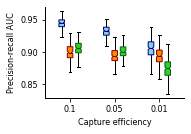

In [9]:
fig = plt.figure(figsize=(6/2.4, 4/2.4))
# gs = GridSpec(1,7)
# gs.update(wspace=0.05, hspace=0.10)
ax = fig.add_subplot(111)
# ax_2 = fig.add_subplot(gs[0,4:7])# option 1, specify props dictionaries

ax.boxplot([psix_1_auc, psix_05_auc, psix_01_auc], positions=[1,5,9], notch=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='navy'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='navy'), showfliers=False
            )

ax.boxplot([kw_1_auc, kw_05_auc, kw_01_auc], positions=[1.75,5.75,9.75], notch=True, patch_artist=True,
            boxprops=dict(facecolor='darkorange', color='darkred'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkred'), showfliers=False
            )

ax.boxplot([gearyc_1_auc, gearyc_05_auc, gearyc_01_auc], positions=[2.5,6.5,10.5], notch=True, patch_artist=True,
            boxprops=dict(facecolor='limegreen', color='darkgreen'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkgreen'), showfliers=False
            )

ax.set_xticks([1.75, 5.75, 9.75])
ax.set_xticklabels(['0.1', '0.05', '0.01'], size=8)
ax.set_xlabel('Capture efficiency', size=8)

ax.set_yticks([0.85, 0.9, 0.95])
ax.set_yticklabels(['0.85', '0.90', '0.95'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlim([-0.5, 12])

plt.savefig('/mnt/lareaulab/cfbuenabadn/plots_pdf/single_lineage_auc.pdf', bbox_inches='tight', res=20000, dpi =2000)
# plt.show()

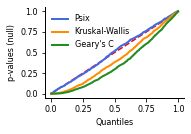

In [10]:
pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(6/2.4, 4/2.4))

ax = fig.add_subplot(111)
ax.plot(sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))),
            sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))), c='red',
        linestyle='--')

ax.plot(sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))),
            sorted(psix_results_1.loc[neg].pvals), label='Psix', linewidth=2, c='royalblue')

ax.plot(sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))),
            sorted(kw_1.loc[neg].pvals), label='Kruskal-Wallis', linewidth=2, c='darkorange')

ax.plot(sorted(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg))),
            sorted(gearyc_1.loc[neg].pvals), label="Geary's C", linewidth=2, c='forestgreen')


ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'], size=8)
ax.set_xlabel('Quantiles', size=8)

ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'], size=8)
ax.set_ylabel('p-values (null)', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend(frameon=False, fontsize=8)

plt.savefig('/mnt/lareaulab/cfbuenabadn/plots_pdf/single_lineage_pvals.pdf', bbox_inches='tight', res=20000, dpi =2000)

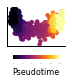

In [25]:
rd = pd.read_csv('processed_tables/pc2_rd.tab.gz', sep='\t', index_col=0)

fig = plt.figure(figsize=(2.5/2.4, 2.5/2.4))
ax = fig.add_subplot(111)

sc = ax.scatter(-rd.PC_1, -rd.PC_2, c=meta.lineage_depth, cmap='inferno', vmin=0, s=20, linewidth=0)
cb = plt.colorbar(sc, shrink = 0.8, aspect=10, orientation="horizontal")
cb.set_label(label='Pseudotime',size=8)
cb.outline.set_visible(False)
cb.ax.tick_params(labelsize=0, length=0)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left = False,
    right = False, # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
labelleft=False)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig('../plots/single_lineage.png', bbox_inches='tight', res=20000, dpi =2000)

In [28]:
underlying_psi = pd.read_csv('sim_output/psi_underlying.tab.gz', sep='\t', 
                               names = ['cell_'+str(i+1) for i in range(1000)])
underlying_psi.index = ['gene' + str(i+1) for i in range(5000)]
underlying_psi = expit(underlying_psi)

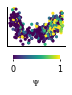

In [30]:
rd = pd.read_csv('processed_tables/pc2_rd.tab.gz', sep='\t', index_col=0)

# pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
# neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(2.5/2.4, 2.5/2.4))
ax = fig.add_subplot(111)

sc = ax.scatter(-rd.PC_1, -rd.PC_2, c=psix_single_lineage_1.adata.uns['psi']['gene316'], vmin=0, vmax=1, s=10, linewidth=0)
cb = plt.colorbar(sc, shrink = 0.8, aspect=10, orientation="horizontal")
cb.set_label(label='$\Psi$',size=8)
cb.outline.set_visible(False)
cb.ax.tick_params(labelsize=8, length=2)


# plt.title('Positives')
# ax.tick_params(labelsize=8, length=1)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left = False,
    right = False, # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
labelleft=False)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig('../plots/positive_pca.png', bbox_inches='tight', res=20000, dpi =2000)

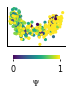

In [31]:
rd = pd.read_csv('processed_tables/pc2_rd.tab.gz', sep='\t', index_col=0)

pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(2.5/2.4, 2.5/2.4))
ax = fig.add_subplot(111)

sc = ax.scatter(-rd.PC_1, -rd.PC_2, c=psix_single_lineage_1.adata.uns['psi']['gene4452'], vmin=0, vmax=1, s=10, linewidth=0)
cb = plt.colorbar(sc, shrink = 0.8, aspect=10, orientation="horizontal")
cb.set_label(label='$\Psi$',size=8)
cb.outline.set_visible(False)
cb.ax.tick_params(labelsize=8, length=2)


# plt.title('Positives')
# ax.tick_params(labelsize=8, length=1)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left = False,
    right = False, # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
labelleft=False)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig('../plots/negative_pca.png', bbox_inches='tight', res=20000, dpi =2000)

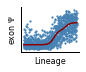

In [32]:
# rd = pd.read_csv('single_lineage/processed_tables/pc2_rd.tab.gz', sep='\t', index_col=0)

# pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
# neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(2.5/2.4, 2/2.4))
ax = fig.add_subplot(111)

ax.scatter(meta.lineage_depth, underlying_psi.loc['gene316'], c='steelblue', s=5, linewidth=0)
ax.plot(meta.sort_values('lineage_depth').lineage_depth, 
        platonic_psi.loc['gene316', meta.sort_values('lineage_depth').index], c='darkred')


ax.set_xlabel('Lineage', size=8)
ax.set_ylabel('exon $\Psi$', size=8)
# ax.tick_params(labelsize=8, length=1)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left = False,
    right = False, # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
labelleft=False)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylim(-0.05, 1.05)

plt.savefig('../plots/positive_psi.png', bbox_inches='tight', res=20000, dpi =2000)

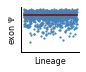

In [33]:
# rd = pd.read_csv('single_lineage/processed_tables/pc2_rd.tab.gz', sep='\t', index_col=0)

# pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
# neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(2.5/2.4, 2/2.4))
ax = fig.add_subplot(111)

ax.scatter(meta.lineage_depth, underlying_psi.loc['gene4452'], c='steelblue', s=5, linewidth=0)
ax.plot(meta.sort_values('lineage_depth').lineage_depth, 
        platonic_psi.loc['gene4452', meta.sort_values('lineage_depth').index], c='darkred')


ax.set_xlabel('Lineage', size=8)
ax.set_ylabel('exon $\Psi$', size=8)
# ax.tick_params(labelsize=8, length=1)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left = False,
    right = False, # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
labelleft=False)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylim(-0.05, 1.05)


plt.savefig('../plots/negative_psi.png', bbox_inches='tight', res=20000, dpi =2000)

In [34]:
gene_expression = pd.read_csv('sim_output/gene_counts.tab.gz', sep='\t', 
                               names = ['cell_'+str(i+1) for i in range(1000)])
gene_expression.index = ['gene' + str(i+1) for i in range(5000)]

# gene_expression = expit(ungene_expression)


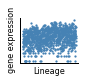

In [35]:

# pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
# neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(2.5/2.4, 2/2.4))
ax = fig.add_subplot(111)

ax.scatter(meta.lineage_depth, np.log1p(gene_expression.loc['gene316']), c='steelblue', s=5, linewidth=0)
# ax.plot(meta.sort_values('lineage_depth').lineage_depth, 
#        gene_expression.loc['gene316', meta.sort_values('lineage_depth').index], c='darkred')


ax.set_xlabel('Lineage', size=8)
ax.set_ylabel('gene expression', size=8)
# ax.tick_params(labelsize=8, length=1)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left = False,
    right = False, # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
labelleft=False)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.set_ylim(-0.05, 1.05)

plt.savefig('../plots/positive_gene.png', bbox_inches='tight', res=20000, dpi =2000)

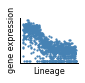

In [36]:

# pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.index
# neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.index


fig = plt.figure(figsize=(2.5/2.4, 2/2.4))
ax = fig.add_subplot(111)

ax.scatter(meta.lineage_depth, np.log1p(gene_expression.loc['gene4452']), c='steelblue', s=5, linewidth=0)
# ax.plot(meta.sort_values('lineage_depth').lineage_depth, 
#        gene_expression.loc['gene316', meta.sort_values('lineage_depth').index], c='darkred')


ax.set_xlabel('Lineage', size=8)
ax.set_ylabel('gene expression', size=8)
# ax.tick_params(labelsize=8, length=1)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,
    left = False,
    right = False, # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
labelleft=False)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.set_ylim(-0.05, 1.05)

plt.savefig('../plots/negative_gene.png', bbox_inches='tight', res=20000, dpi =2000)

In [39]:
import os 

# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=5)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_5.tab.gz', sep='\t', index=True, header=True)

# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=10)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_10.tab.gz', sep='\t', index=True, header=True)


# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=20)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_20.tab.gz', sep='\t', index=True, header=True)


# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=30)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_30.tab.gz', sep='\t', index=True, header=True)

# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=50)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_50.tab.gz', sep='\t', index=True, header=True)

# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=100)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_100.tab.gz', sep='\t', index=True, header=True)

# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=150)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_150.tab.gz', sep='\t', index=True, header=True)

# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=200)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_200.tab.gz', sep='\t', index=True, header=True)

# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=250)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_250.tab.gz', sep='\t', index=True, header=True)

# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=300)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_300.tab.gz', sep='\t', index=True, header=True)

# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=400)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_400.tab.gz', sep='\t', index=True, header=True)

# psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz', n_jobs=25,
#                                 n_random_exons=2000, n_neighbors=500)
# psix_single_lineage_1.psix_results.to_csv('k_sensitivity/k_500.tab.gz', sep='\t', index=True, header=True)


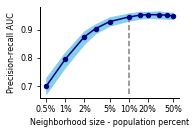

In [49]:
psix_5 = pd.read_csv('k_sensitivity/k_5.tab.gz', sep='\t', index_col=0)
psix_10 = pd.read_csv('k_sensitivity/k_10.tab.gz', sep='\t', index_col=0)
psix_20 = pd.read_csv('k_sensitivity/k_20.tab.gz', sep='\t', index_col=0)
psix_30 = pd.read_csv('k_sensitivity/k_30.tab.gz', sep='\t', index_col=0)
psix_50 = pd.read_csv('k_sensitivity/k_50.tab.gz', sep='\t', index_col=0)
psix_100 = pd.read_csv('k_sensitivity/k_100.tab.gz', sep='\t', index_col=0)
psix_150 = pd.read_csv('k_sensitivity/k_150.tab.gz', sep='\t', index_col=0)
psix_200 = pd.read_csv('k_sensitivity/k_200.tab.gz', sep='\t', index_col=0)
psix_300 = pd.read_csv('k_sensitivity/k_300.tab.gz', sep='\t', index_col=0)
psix_400 = pd.read_csv('k_sensitivity/k_400.tab.gz', sep='\t', index_col=0)
psix_500 = pd.read_csv('k_sensitivity/k_500.tab.gz', sep='\t', index_col=0)

pos = []
neg = []
for i in range(5000):
    if ('gene'+str(i+1)) in psix_5.index:

        if (platonic_psi.loc['gene'+str(i+1)].max() - platonic_psi.loc['gene'+str(i+1)].min()) >= 0.2:
            pos.append('gene'+str(i+1))
        else:
        #elif ds[i] == 0:
            neg.append('gene'+str(i+1))

    
labels = [1]*len(pos) + [0]*len(neg)
order = list(pos) + list(neg)

    
y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])

boxplot_list = []
for x in [psix_5, psix_10, psix_20, psix_30, psix_50, psix_100, psix_150, psix_200, psix_300, psix_400, psix_500]:
    
    box = []
    for i in range(200):
        
        pos_sample = np.random.choice(pos, int(len(pos)*0.2), replace=False)
        neg_sample = np.random.choice(neg, int(len(neg)*0.2), replace=False)

        labels = [1]*len(pos_sample) + [0]*len(neg_sample)
        order = list(pos_sample) + list(neg_sample)


        y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])
        
        
        pre, rec, thres = precision_recall_curve(y_, x.loc[order].psix_score)
    
        box.append(auc(rec, pre))

    boxplot_list.append(box)

    

names = pd.Index(['gene' + str(i) for i in range(1, 5001)]) & psix_5.index

pos = []
neg = []
order = []
y = []
for i in range(5000):
    if ('gene'+str(i+1)) in psix_5.index:

        if (platonic_psi.loc['gene'+str(i+1)].max() - platonic_psi.loc['gene'+str(i+1)].min()) >= 0.2:
            y.append(1)
            pos.append('gene'+str(i+1))
            order.append('gene'+str(i+1))
        else:
#         elif ds[i] == 0:
            neg.append('gene'+str(i+1))
            y.append(0)
            order.append('gene'+str(i+1))
    
    
recall_list = []
for x in [psix_5, psix_10, psix_20, psix_30, psix_50, psix_100, psix_150, psix_200, psix_300, psix_400, psix_500]:
    pre, rec, thres = precision_recall_curve(y, x.loc[order].psix_score)
    
    recall_list.append(auc(rec, pre))


fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)

ax.fill_between(np.log10(np.array([0.5, 1, 2, 3, 5, 10, 15, 20, 30, 40, 50])), [np.quantile(x, 0.05) for x in boxplot_list], 
                 [np.quantile(x, 0.95) for x in boxplot_list], color='skyblue')

ax.plot([1, 1], [np.quantile(boxplot_list[0], 0.05), recall_list[5]], linestyle='--', c='gray')

ax.scatter(np.log10(np.array([0.5, 1, 2, 3, 5, 10, 15, 20, 30, 40, 50])), recall_list, c='navy', zorder=20, s=20)

ax.plot(np.log10(np.array([0.5, 1, 2, 3, 5, 10, 15, 20, 30, 40, 50])), recall_list, c='navy', zorder=20)

ax.set_xticks(np.log10(np.array([0.5, 1, 2, 5, 10, 20, 50])))

ax.set_xticklabels(['0.5%', '1%', '2%', '5%', '10%', '20%', '50%'], size=8)

ax.set_xlabel('Neighborhood size - population percent', size=8)

ax.set_yticks([0.7, 0.8, 0.9])
ax.set_yticklabels(['0.7', '0.8', '0.9'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# ax.set_xlim([-0.5, 12])

plt.savefig('../plots/single_lineage_kauc.png', bbox_inches='tight', res=20000, dpi =2000)


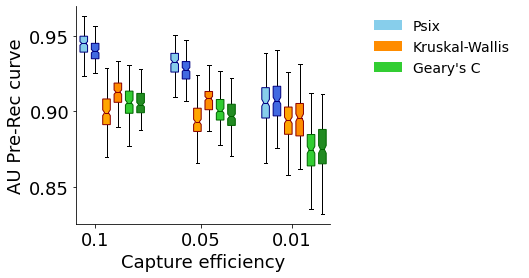

In [25]:
fig = plt.figure(figsize=(8, 4))
gs = GridSpec(1,7)
gs.update(wspace=0.05, hspace=0.10)
ax = fig.add_subplot(gs[0,0:4])
ax_2 = fig.add_subplot(gs[0,4:7])# option 1, specify props dictionaries

ax.boxplot([psix_1_auc, psix_05_auc, psix_01_auc], positions=[1,7,13], notch=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='navy'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='navy'), showfliers=False
            )

ax.boxplot([psix_1_auc_, psix_05_auc_, psix_01_auc_], positions=[1.75,7.75,13.75], notch=True, patch_artist=True,
            boxprops=dict(facecolor='royalblue', color='navy'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='navy'), showfliers=False
            )

ax.boxplot([kw_1_auc, kw_05_auc, kw_01_auc], positions=[2.5,8.5,14.5], notch=True, patch_artist=True,
            boxprops=dict(facecolor='orange', color='darkred'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkred'), showfliers=False
            )

ax.boxplot([kw_1_auc_, kw_05_auc_, kw_01_auc_], positions=[3.25,9.25,15.25], notch=True, patch_artist=True,
            boxprops=dict(facecolor='darkorange', color='darkred'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkred'), showfliers=False
            )

ax.boxplot([gearyc_1_auc, gearyc_05_auc, gearyc_01_auc], positions=[4,10,16], notch=True, patch_artist=True,
            boxprops=dict(facecolor='limegreen', color='darkgreen'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkgreen'), showfliers=False
            )

ax.boxplot([gearyc_1_auc_, gearyc_05_auc_, gearyc_01_auc_], positions=[4.75,10.75,16.75], notch=True, patch_artist=True,
            boxprops=dict(facecolor='forestgreen', color='darkgreen'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkgreen'), showfliers=False
            )

ax.set_xticks([1.75, 8.75, 14.75])
ax.set_xticklabels(['0.1', '0.05', '0.01'], size=18)
ax.set_xlabel('Capture efficiency', size=18)

ax.set_yticks([0.85, 0.9, 0.95])
ax.set_yticklabels(['0.85', '0.90', '0.95'], size=18)
ax.set_ylabel('AU Pre-Rec curve', size=18)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax_2.set_xlim([0, 0])

ax_2.hist([-1, -1], color='skyblue', label='Psix')
ax_2.hist([-1, -1], color='darkorange', label='Kruskal-Wallis')
ax_2.hist([-1, -1], color='limegreen', label="Geary's C")

ax_2.spines["bottom"].set_visible(False)
ax_2.spines["top"].set_visible(False)
ax_2.spines["right"].set_visible(False)
ax_2.spines["left"].set_visible(False)

ax_2.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,  
    right=False,
    left=False, # ticks along the top edge are off
    labelleft=False,
    labelbottom=False)

ax_2.legend(frameon=False, fontsize=14)

# Psix performance in differentially expressed genes

We run slingshot on the simulated gene trajectory to obtain a lineage pseudotime. Then we run tradeseq to get differentially expressed genes.

This code is on ```run_slingshot.Rmd```. The output of tradeseq is on ```processed_tables/ATres.tab```.

In [11]:
from statsmodels.stats.multitest import multipletests

ATres = pd.read_csv('processed_tables/ATres.tab.gz', sep='\t', index_col=0)

idx = [int(x.split('gene')[1]) for x in psix_results_1.index]
ATres['FDR'] = multipletests(ATres.pvalue)[1]
ATres = ATres.loc[idx]
ATres['significant'] = (ATres.loc[idx].FDR < 0.05) & (ATres.loc[idx].meanLogFC >= 0.25)


In [12]:
ATres.head(5)

,waldStat,df,pvalue,meanLogFC,FDR,significant
1128,0.535707,4,9.699331e-01,0.012144,1.000000e+00,False
1880,27.276286,4,1.747897e-05,0.404205,3.295231e-02,True
2332,15.913010,4,3.138140e-03,0.124870,9.883284e-01,False
705,537.670351,4,0.000000e+00,0.645671,0.000000e+00,True
1878,69.716086,4,2.609024e-14,0.132263,7.498335e-11,False


In [13]:
DE = ATres.loc[ATres.significant].index
nonDE = ATres.loc[~ATres.significant].index

In [14]:
psi_platonic = pd.read_csv('sim_output/psi_platonic.tab.gz', sep='\t',
                          names = range(1000))
psi_platonic.index = range(1, 5001)
psi_platonic = psi_platonic.loc[np.array(idx)]

In [15]:
nonDS = psi_platonic.loc[
    (psi_platonic.var(axis=1) <= 10e-20) | ((psi_platonic.max(axis=1) - psi_platonic.min(axis=1)) < 0.2)].index
DS = psi_platonic.loc[
    (psi_platonic.var(axis=1) >= 10e-20) & ((psi_platonic.max(axis=1) - psi_platonic.min(axis=1)) >= 0.2)].index

In [16]:
DE_nonDS = DE.intersection(nonDS)
DE_DS = DE.intersection(DS)

nonDE_nonDS = nonDE.intersection(nonDS)
nonDE_DS = nonDE.intersection(DS)

In [17]:
len(DE_DS)/len(DE)

0.48129359543436906

In [18]:
(psix_results_1.loc[['gene'+str(x) for x in DE_nonDS]].qvals <= 0.05).mean()

0.01589242053789731

In [45]:
(kw_1.loc[['gene'+str(x) for x in DE_nonDS]].qvals <= 0.05).mean()

0.14792176039119803

In [46]:
(psix_results_1.loc[['gene'+str(x) for x in DE_DS]].qvals <= 0.01).mean()

0.6324110671936759

In [47]:
(kw_1.loc[['gene'+str(x) for x in DE_DS]].qvals <= 0.05).mean()

0.7852437417654808

In [48]:
(psix_results_1.loc[['gene'+str(x) for x in nonDE_DS]].qvals <= 0.05).mean()

0.7033985581874357

In [49]:
(kw_1.loc[['gene'+str(x) for x in nonDE_DS]].qvals <= 0.05).mean()

0.7456230690010298

In [50]:
(psix_results_1.loc[['gene'+str(x) for x in nonDE_nonDS]].qvals <= 0.05).mean()

0.013859275053304905

In [51]:
(kw_1.loc[['gene'+str(x) for x in nonDE_nonDS]].qvals <= 0.05).mean()

0.04797441364605544

In [19]:
from scipy.special import logit, expit
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc




platonic_psi = pd.read_csv('sim_output/psi_platonic.tab.gz', sep='\t', 
                               names = ['cell_'+str(i+1) for i in range(1000)])
platonic_psi.index = ['gene' + str(i+1) for i in range(5000)]

platonic_psi = expit(platonic_psi)


def get_random_samples(psix_results, kw, gearyc):
    
    pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results.index
    neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results.index

    psix_auc = []
    kw_auc = []
    gearyc_auc = []

    for i in tqdm(range(200)):

        pos_sample = np.random.choice(pos, int(len(pos)*0.2), replace=False)
        neg_sample = np.random.choice(neg, int(len(neg)*0.2), replace=False)

        labels = [1]*len(pos_sample) + [0]*len(neg_sample)
        order = list(pos_sample) + list(neg_sample)


        y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])


        pre, rec, thres = precision_recall_curve(y_, psix_results.loc[order].psix_score)
        pre_kw, rec_kw, thres_kw = precision_recall_curve(y_, kw.loc[order].KW_score)
        pre_c, rec_c, thres_c = precision_recall_curve(y_, gearyc.loc[order].C_score)

        psix_auc.append(auc(rec, pre))
        kw_auc.append(auc(rec_kw, pre_kw))
        gearyc_auc.append(auc(rec_c, pre_c))
        
    return psix_auc, kw_auc, gearyc_auc

In [20]:
psix_auc, kw_auc, gearyc_auc = get_random_samples(psix_results_1, kw_1, gearyc_1)

psix_DE_auc, kw_DE_auc, gearyc_DE_auc = get_random_samples(psix_results_1.loc[['gene'+str(x) for x in DE]], 
                                                        kw_1.loc[['gene'+str(x) for x in DE]], 
                                                        gearyc_1.loc[['gene'+str(x) for x in DE]])

psix_nonDE_auc, kw_nonDE_auc, gearyc_nonDE_auc = get_random_samples(psix_results_1.loc[['gene'+str(x) for x in nonDE]], 
                                                        kw_1.loc[['gene'+str(x) for x in nonDE]], 
                                                        gearyc_1.loc[['gene'+str(x) for x in nonDE]])


100%|██████████| 200/200 [00:06<00:00, 32.53it/s]


In [21]:
from scipy.stats import f_oneway, ranksums

In [22]:
ranksums(psix_nonDE_auc, psix_DE_auc)

RanksumsResult(statistic=-4.407759197952194, pvalue=1.0444557229165906e-05)

In [23]:
pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results_1.loc[['gene'+str(x) for x in DE]].index
neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results_1.loc[['gene'+str(x) for x in DE]].index

    
labels = [1]*len(pos) + [0]*len(neg)
order = list(pos) + list(neg)

y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])


pre, rec, thres = precision_recall_curve(y_, psix_results_1.loc[order].psix_score)
pre_kw, rec_kw, thres_kw = precision_recall_curve(y_, kw_1.loc[order].KW_score)
pre_c, rec_c, thres_c = precision_recall_curve(y_, gearyc_1.loc[order].C_score)


print(auc(rec, pre))
print(auc(rec_kw, pre_kw))
print(auc(rec_c, pre_c))

0.9468263193958526
0.8843380467136673
0.8891371324999124


In [24]:
np.mean(psix_nonDE_auc)

0.9425429215687996

In [25]:
np.mean(psix_DE_auc)

0.9472976054035357

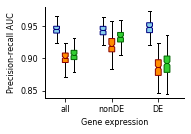

In [26]:
fig = plt.figure(figsize=(6/2.4, 4/2.4))
# gs = GridSpec(1,7)
# gs.update(wspace=0.05, hspace=0.10)
ax = fig.add_subplot(111)
# ax_2 = fig.add_subplot(gs[0,4:7])# option 1, specify props dictionaries

ax.boxplot([psix_auc, psix_nonDE_auc, psix_DE_auc], positions=[1,5, 9], notch=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='navy'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='navy'), showfliers=False
            )

ax.boxplot([kw_auc, kw_nonDE_auc, kw_DE_auc], positions=[1.75,5.75, 9.75], notch=True, patch_artist=True,
            boxprops=dict(facecolor='darkorange', color='darkred'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkred'), showfliers=False
            )

ax.boxplot([gearyc_auc, gearyc_nonDE_auc, gearyc_DE_auc], positions=[2.5,6.5, 10.5], notch=True, patch_artist=True,
            boxprops=dict(facecolor='limegreen', color='darkgreen'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkgreen'), showfliers=False
            )

ax.set_xticks([1.75, 5.75, 9.75])
ax.set_xticklabels(['all', 'nonDE', 'DE'], size=8)
ax.set_xlabel('Gene expression', size=8)

ax.set_yticks([0.85, 0.9, 0.95])
ax.set_yticklabels(['0.85', '0.90', '0.95'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlim([0, 12])

plt.savefig('/mnt/lareaulab/cfbuenabadn/plots_pdf/single_lineage_auc_DEvnonDE.pdf', bbox_inches='tight', res=20000, dpi =2000)
plt.show()

(0.0, 8.0)

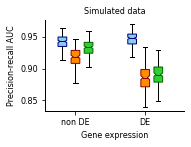

In [18]:
fig = plt.figure(figsize=(6/2.4, 4/2.4))
# gs = GridSpec(1,7)
# gs.update(wspace=0.05, hspace=0.10)
ax = fig.add_subplot(111)
# ax_2 = fig.add_subplot(gs[0,4:7])# option 1, specify props dictionaries

ax.boxplot([psix_nonDE_auc, psix_DE_auc], positions=[1,5], notch=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='navy'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='navy'), showfliers=False
            )

ax.boxplot([kw_nonDE_auc, kw_DE_auc], positions=[1.75,5.75], notch=True, patch_artist=True,
            boxprops=dict(facecolor='darkorange', color='darkred'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkred'), showfliers=False
            )

ax.boxplot([gearyc_nonDE_auc, gearyc_DE_auc], positions=[2.5,6.5], notch=True, patch_artist=True,
            boxprops=dict(facecolor='limegreen', color='darkgreen'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkgreen'), showfliers=False
            )

ax.set_xticks([1.75, 5.75])
ax.set_xticklabels(['non DE', 'DE'], size=8)
ax.set_xlabel('Gene expression', size=8)
ax.set_title('Simulated data', size=8)

ax.set_yticks([0.85, 0.9, 0.95])
ax.set_yticklabels(['0.85', '0.90', '0.95'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlim([0, 8])

# plt.savefig('../plots/single_lineage_auc_DEvnonDE.png', bbox_inches='tight', res=20000, dpi =2000)
# plt.show()

In [18]:
midDE = ATres.loc[(ATres.loc[idx].FDR < 0.05) & (ATres.loc[idx].meanLogFC >= 0.25) & (ATres.loc[idx].meanLogFC < 0.75)].index
bigDE = ATres.loc[(ATres.loc[idx].FDR < 0.05) & (ATres.loc[idx].meanLogFC >= 0.75)].index
nDE = ATres.loc[(ATres.loc[idx].FDR > 0.05) | (ATres.loc[idx].meanLogFC < 0.25)].index


psix_bigDE_auc, kw_bigDE_auc, gearyc_bigDE_auc = get_random_samples(psix_results_1.loc[['gene'+str(x) for x in bigDE]], 
                                                        kw_1.loc[['gene'+str(x) for x in bigDE]], 
                                                        gearyc_1.loc[['gene'+str(x) for x in bigDE]])

psix_midDE_auc, kw_midDE_auc, gearyc_midDE_auc = get_random_samples(psix_results_1.loc[['gene'+str(x) for x in midDE]], 
                                                        kw_1.loc[['gene'+str(x) for x in midDE]], 
                                                        gearyc_1.loc[['gene'+str(x) for x in midDE]])

psix_nDE_auc, kw_nDE_auc, gearyc_nDE_auc = get_random_samples(psix_results_1.loc[['gene'+str(x) for x in nDE]], 
                                                        kw_1.loc[['gene'+str(x) for x in nDE]], 
                                                        gearyc_1.loc[['gene'+str(x) for x in nDE]])


100%|██████████| 200/200 [00:05<00:00, 34.67it/s]


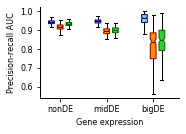

In [19]:
fig = plt.figure(figsize=(6/2.4, 4/2.4))
# gs = GridSpec(1,7)
# gs.update(wspace=0.05, hspace=0.10)
ax = fig.add_subplot(111)
# ax_2 = fig.add_subplot(gs[0,4:7])# option 1, specify props dictionaries

ax.boxplot([psix_nDE_auc, psix_midDE_auc, psix_bigDE_auc], positions=[1,5, 9], notch=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='navy'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='navy'), showfliers=False
            )

ax.boxplot([kw_nDE_auc, kw_midDE_auc, kw_bigDE_auc], positions=[1.75,5.75, 9.75], notch=True, patch_artist=True,
            boxprops=dict(facecolor='darkorange', color='darkred'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkred'), showfliers=False
            )

ax.boxplot([gearyc_nDE_auc, gearyc_midDE_auc, gearyc_bigDE_auc], positions=[2.5,6.5, 10.5], notch=True, patch_artist=True,
            boxprops=dict(facecolor='limegreen', color='darkgreen'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkgreen'), showfliers=False
            )

ax.set_xticks([1.75, 5.75, 9.75])
ax.set_xticklabels(['nonDE', 'midDE', 'bigDE'], size=8)
ax.set_xlabel('Gene expression', size=8)

ax.set_yticks([0.6, 0.7, 0.8, 0.9, 1])
ax.set_yticklabels(['0.6', '0.7', '0.8', '0.9', '1.0'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlim([0, 12])

plt.savefig('../plots/single_lineage_auc_bigDE_v_midDE_v_nonDE.png', bbox_inches='tight', res=20000, dpi =2000)
# plt.show()

In [61]:
from scipy.special import logit, expit
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc




platonic_psi = pd.read_csv('sim_output/psi_platonic.tab.gz', sep='\t', 
                               names = ['cell_'+str(i+1) for i in range(1000)])
platonic_psi.index = ['gene' + str(i+1) for i in range(5000)]

platonic_psi = expit(platonic_psi)


def get_random_samples(psix_results, kw, gearyc):
    
    pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results.index
    neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results.index

    psix_auc = []
    kw_auc = []
    gearyc_auc = []

    for i in tqdm(range(200)):

        pos_sample = np.random.choice(pos, int(len(pos)*0.2), replace=False)
        neg_sample = np.random.choice(neg, int(len(neg)*0.2), replace=False)

        labels = [1]*len(pos_sample) + [0]*len(neg_sample)
        order = list(pos_sample) + list(neg_sample)


        y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])


        rec = precision_score(y_, psix_results.loc[order].qvals<=0.05)
        rec_kw = precision_score(y_, kw.loc[order].qvals<=0.05)
        rec_c = precision_score(y_, gearyc.loc[order].qvals<=0.05)

        psix_auc.append(rec)
        kw_auc.append(rec_kw)
        gearyc_auc.append(rec_c)
        
    return psix_auc, kw_auc, gearyc_auc

In [62]:
psix_auc, kw_auc, gearyc_auc = get_random_samples(psix_results_1, kw_1, gearyc_1)

psix_DE_auc, kw_DE_auc, gearyc_DE_auc = get_random_samples(psix_results_1.loc[['gene'+str(x) for x in DE]], 
                                                        kw_1.loc[['gene'+str(x) for x in DE]], 
                                                        gearyc_1.loc[['gene'+str(x) for x in DE]])

psix_nonDE_auc, kw_nonDE_auc, gearyc_nonDE_auc = get_random_samples(psix_results_1.loc[['gene'+str(x) for x in nonDE]], 
                                                        kw_1.loc[['gene'+str(x) for x in nonDE]], 
                                                        gearyc_1.loc[['gene'+str(x) for x in nonDE]])


100%|██████████| 200/200 [00:06<00:00, 32.69it/s]


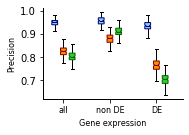

In [63]:
fig = plt.figure(figsize=(6/2.4, 4/2.4))
# gs = GridSpec(1,7)
# gs.update(wspace=0.05, hspace=0.10)
ax = fig.add_subplot(111)
# ax_2 = fig.add_subplot(gs[0,4:7])# option 1, specify props dictionaries

ax.boxplot([psix_auc, psix_nonDE_auc, psix_DE_auc], positions=[1,5, 9], notch=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='navy'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='navy'), showfliers=False
            )

ax.boxplot([kw_auc, kw_nonDE_auc, kw_DE_auc], positions=[1.75,5.75, 9.75], notch=True, patch_artist=True,
            boxprops=dict(facecolor='darkorange', color='darkred'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkred'), showfliers=False
            )

ax.boxplot([gearyc_auc, gearyc_nonDE_auc, gearyc_DE_auc], positions=[2.5,6.5, 10.5], notch=True, patch_artist=True,
            boxprops=dict(facecolor='limegreen', color='darkgreen'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkgreen'), showfliers=False
            )

ax.set_xticks([1.75, 5.75, 9.75])
ax.set_xticklabels(['all', 'non DE', 'DE'], size=8)
ax.set_xlabel('Gene expression', size=8)

# ax.set_yticks([0.85, 0.9, 0.95])
# ax.set_yticklabels(['0.85', '0.90', '0.95'], size=8)
ax.set_ylabel('Precision', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlim([0, 12])

plt.savefig('../plots/single_lineage_precision_DEvnonDE.png', bbox_inches='tight', res=20000, dpi =2000)
# plt.show()

100%|██████████| 200/200 [00:06<00:00, 32.56it/s]


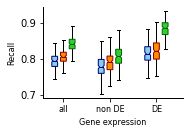

In [64]:
from scipy.special import logit, expit
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc




platonic_psi = pd.read_csv('sim_output/psi_platonic.tab.gz', sep='\t', 
                               names = ['cell_'+str(i+1) for i in range(1000)])
platonic_psi.index = ['gene' + str(i+1) for i in range(5000)]

platonic_psi = expit(platonic_psi)


def get_random_samples(psix_results, kw, gearyc):
    
    pos = pd.Index(['gene' + str(i) for i in range(1, 2501)]) & psix_results.index
    neg = pd.Index(['gene' + str(i) for i in range(2501, 5001)]) & psix_results.index

    psix_auc = []
    kw_auc = []
    gearyc_auc = []

    for i in tqdm(range(200)):

        pos_sample = np.random.choice(pos, int(len(pos)*0.2), replace=False)
        neg_sample = np.random.choice(neg, int(len(neg)*0.2), replace=False)

        labels = [1]*len(pos_sample) + [0]*len(neg_sample)
        order = list(pos_sample) + list(neg_sample)


        y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[order])


        rec = recall_score(y_, psix_results.loc[order].qvals<=0.05)
        rec_kw = recall_score(y_, kw.loc[order].qvals<=0.05)
        rec_c = recall_score(y_, gearyc.loc[order].qvals<=0.05)

        psix_auc.append(rec)
        kw_auc.append(rec_kw)
        gearyc_auc.append(rec_c)
        
    return psix_auc, kw_auc, gearyc_auc

psix_auc, kw_auc, gearyc_auc = get_random_samples(psix_results_1, kw_1, gearyc_1)

psix_DE_auc, kw_DE_auc, gearyc_DE_auc = get_random_samples(psix_results_1.loc[['gene'+str(x) for x in DE]], 
                                                        kw_1.loc[['gene'+str(x) for x in DE]], 
                                                        gearyc_1.loc[['gene'+str(x) for x in DE]])

psix_nonDE_auc, kw_nonDE_auc, gearyc_nonDE_auc = get_random_samples(psix_results_1.loc[['gene'+str(x) for x in nonDE]], 
                                                        kw_1.loc[['gene'+str(x) for x in nonDE]], 
                                                        gearyc_1.loc[['gene'+str(x) for x in nonDE]])


fig = plt.figure(figsize=(6/2.4, 4/2.4))
# gs = GridSpec(1,7)
# gs.update(wspace=0.05, hspace=0.10)
ax = fig.add_subplot(111)
# ax_2 = fig.add_subplot(gs[0,4:7])# option 1, specify props dictionaries

ax.boxplot([psix_auc, psix_nonDE_auc, psix_DE_auc], positions=[1,5, 9], notch=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='navy'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='navy'), showfliers=False
            )

ax.boxplot([kw_auc, kw_nonDE_auc, kw_DE_auc], positions=[1.75,5.75, 9.75], notch=True, patch_artist=True,
            boxprops=dict(facecolor='darkorange', color='darkred'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkred'), showfliers=False
            )

ax.boxplot([gearyc_auc, gearyc_nonDE_auc, gearyc_DE_auc], positions=[2.5,6.5, 10.5], notch=True, patch_artist=True,
            boxprops=dict(facecolor='limegreen', color='darkgreen'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='darkgreen'), showfliers=False
            )

ax.set_xticks([1.75, 5.75, 9.75])
ax.set_xticklabels(['all', 'non DE', 'DE'], size=8)
ax.set_xlabel('Gene expression', size=8)

# ax.set_yticks([0.85, 0.9, 0.95])
# ax.set_yticklabels(['0.85', '0.90', '0.95'], size=8)
ax.set_ylabel('Recall', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlim([0, 12])

plt.savefig('../plots/single_lineage_recall_DEvnonDE.png', bbox_inches='tight', res=20000, dpi =2000)
# plt.show()

In [41]:
psix_de = psix_results_1.index.intersection(pd.Index(['gene'+str(x) for x in DE]))
psix_nonde = psix_results_1.index.intersection(pd.Index(['gene'+str(x) for x in nonDE]))

y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[psix_de])
psix_rec_DE = recall_score(y_, psix_results_1.loc[psix_de].qvals<=0.05)
psix_pre_DE = precision_score(y_, psix_results_1.loc[psix_de].qvals<=0.05)

print(psix_rec_DE)
print(psix_pre_DE)

y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[psix_nonde])
psix_rec_nonDE = recall_score(y_, psix_results_1.loc[psix_nonde].qvals<=0.05)
psix_pre_nonDE = precision_score(y_, psix_results_1.loc[psix_nonde].qvals<=0.05)


print(psix_rec_nonDE)
print(psix_pre_nonDE)

0.8134328358208955
0.936426116838488
0.781433607520564
0.9554597701149425


In [45]:
kw_de = kw_1.index.intersection(pd.Index(['gene'+str(x) for x in DE]))
kw_nonde = kw_1.index.intersection(pd.Index(['gene'+str(x) for x in nonDE]))

y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[kw_de])
kw_rec_DE = recall_score(y_, kw_1.loc[kw_de].qvals<=0.05)
kw_pre_DE = precision_score(y_, kw_1.loc[kw_de].qvals<=0.05)

y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[kw_nonde])
kw_rec_nonDE = recall_score(y_, kw_1.loc[kw_nonde].qvals<=0.05)
kw_pre_nonDE = precision_score(y_, kw_1.loc[kw_nonde].qvals<=0.05)


print(kw_rec_DE)
print(kw_pre_DE)
print(kw_rec_nonDE)
print(kw_pre_nonDE)

0.8208955223880597
0.7670850767085077
0.7931844888366627
0.8777633289986996


In [46]:
gearyc_de = gearyc_1.index.intersection(pd.Index(['gene'+str(x) for x in DE]))
gearyc_nonde = gearyc_1.index.intersection(pd.Index(['gene'+str(x) for x in nonDE]))

y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[gearyc_de])
gearyc_rec_DE = recall_score(y_, gearyc_1.loc[gearyc_de].qvals<=0.05)
gearyc_pre_DE = precision_score(y_, gearyc_1.loc[gearyc_de].qvals<=0.05)

y_ = list(((platonic_psi.max(axis=1) - platonic_psi.min(axis=1)) >= 0.2).astype(int).loc[gearyc_nonde])
gearyc_rec_nonDE = recall_score(y_, gearyc_1.loc[gearyc_nonde].qvals<=0.05)
gearyc_pre_nonDE = precision_score(y_, gearyc_1.loc[gearyc_nonde].qvals<=0.05)


print(gearyc_rec_DE)
print(gearyc_pre_DE)
print(gearyc_rec_nonDE)
print(gearyc_pre_nonDE)

0.8835820895522388
0.7072879330943848
0.8108108108108109
0.9090909090909091


Text(0, 0.5, 'Precision')

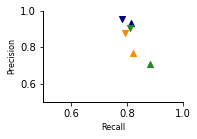

In [55]:
fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)

ax.scatter([psix_rec_nonDE], [psix_pre_nonDE], marker='v', c='navy')
ax.scatter([psix_rec_DE], [psix_pre_DE], marker='^', c='navy')

ax.scatter([kw_rec_nonDE], [kw_pre_nonDE], marker='v', c='darkorange')
ax.scatter([kw_rec_DE], [kw_pre_DE], marker='^', c='darkorange')

ax.scatter([gearyc_rec_nonDE], [gearyc_pre_nonDE], marker='v', c='forestgreen')
ax.scatter([gearyc_rec_DE], [gearyc_pre_DE], marker='^', c='forestgreen')


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlim([0.5, 1])
ax.set_ylim([0.5, 1])


ax.set_xlabel('Recall', size=8)
ax.set_ylabel('Precision', size=8)


In [27]:
from scipy.special import logit, expit
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [28]:
deltaPSI = expit(psi_platonic).max(axis=1) - expit(psi_platonic).min(axis=1)

In [29]:
bin_0 = deltaPSI.loc[(deltaPSI <= 0.01)].index
bin_0_20 = deltaPSI.loc[(deltaPSI > 0.01) & (deltaPSI <= 0.2)].index
bin_20_40 = deltaPSI.loc[(deltaPSI > 0.2) & (deltaPSI <= 0.4)].index
bin_40_60 = deltaPSI.loc[(deltaPSI > 0.4) & (deltaPSI <= 0.6)].index
bin_60_80 = deltaPSI.loc[(deltaPSI > 0.6) & (deltaPSI <= 0.8)].index
bin_80 = deltaPSI.loc[(deltaPSI > 0.8)].index

In [30]:
def get_recall(predict, exon_bin):
    return recall_score(([True]*len(exon_bin)), predict.loc[['gene'+str(x) for x in exon_bin]])


def get_precision(predict, deltaPSI, cutoff):
    delta_pos = ['gene'+str(x) for x in deltaPSI.loc[deltaPSI >= cutoff].index]
    delta_neg = ['gene'+str(x) for x in deltaPSI.loc[deltaPSI < 0.01].index]
    
    delta_y = [True]*len(delta_pos) + [False]*len(delta_neg)
    
    print(len(delta_y))
    
    return precision_score(delta_y, predict.loc[delta_pos + delta_neg])

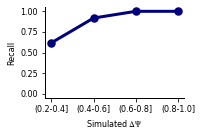

In [31]:
fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)

plt.plot([ 0.4, 0.6, 0.8, 1.0],
     [#get_recall((psix_results_1.qvals <= 0.05), bin_0_20),
      get_recall((psix_results_1.qvals <= 0.05), bin_20_40),
      get_recall((psix_results_1.qvals <= 0.05), bin_40_60),
      get_recall((psix_results_1.qvals <= 0.05), bin_60_80),
      get_recall((psix_results_1.qvals <= 0.05), bin_80)],
        c='navy', linewidth=3)

plt.scatter([ 0.4, 0.6, 0.8, 1.0],
     [#get_recall((psix_results_1.qvals <= 0.05), bin_0_20),
      get_recall((psix_results_1.qvals <= 0.05), bin_20_40),
      get_recall((psix_results_1.qvals <= 0.05), bin_40_60),
      get_recall((psix_results_1.qvals <= 0.05), bin_60_80),
      get_recall((psix_results_1.qvals <= 0.05), bin_80)],
            s=30, c='navy', linewidth=3)

plt.xlabel(r'Simulated $\Delta \Psi$', fontsize=8)
plt.ylabel('Recall', fontsize=8)
ax.set_xticks([ 0.4, 0.6, 0.8, 1.0])
ax.set_xticklabels(['(0.2-0.4]', '(0.4-0.6]', '(0.6-0.8]', '(0.8-1.0]'])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.ylim([-0.05, 1.05])

ax.tick_params(axis='both', which='major', labelsize=8)
plt.savefig('/mnt/lareaulab/cfbuenabadn/plots_pdf/delta_psi_psix_recall.pdf', bbox_inches='tight', res=20000, dpi =2000)
plt.show()

In [32]:
precision_score(deltaPSI >= 0.2, (psix_results_1.loc[['gene'+str(x) for x in deltaPSI.index]].qvals <= 0.05))

0.94679186228482

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
def get_stats(x, pos, neg):
    
    pos = x.index.intersection(pos)
    neg = x.index.intersection(neg)
          
    labels = [1]*len(pos) + [0]*len(neg)
    pred = list(x.loc[pos]) + list(x.loc[neg])
    
    stats_dict = {}
    
    stats_dict.update({'precision':precision_score(labels, pred)})
    stats_dict.update({'recall':recall_score(labels, pred)})
    stats_dict.update({'f1_score':f1_score(labels, pred)})
          
    return stats_dict
          
    
def get_stats_DE(x, pos, neg, isDE):
    
    pos_DE = pos.intersection(isDE.loc[isDE].index)
    neg_DE = neg.intersection(isDE.loc[isDE].index)
    
    pos_nonDE = pos.intersection(isDE.loc[~isDE].index)
    neg_nonDE = neg.intersection(isDE.loc[~isDE].index)
    
    stats_dict = {}
    
    stats_dict.update({'all':get_stats(x, pos, neg)})
    stats_dict.update({'DE':get_stats(x, pos_DE, neg_DE)})
    stats_dict.update({'nonDE':get_stats(x, pos_nonDE, neg_nonDE)})
    
    return stats_dict





In [ ]:
# ATres.index = ['gene'+str(x) for x in ATres.index]
# nonDS = pd.Index(['gene' + str(x) for x in nonDS])
# DS = pd.Index(['gene' + str(x) for x in DS])

In [ ]:
psix_stats =[]
kw_stats = []
gearyc_stats = []
for i in tqdm(range(200), position=0, leave=True):
    psix_stats.append(get_stats_DE(psix_results_1.qvals <= 0.05, 
                              pd.Index(np.random.choice(weyn_pos.intersection(psix_results_1.index), int(len(weyn_pos.intersection(psix_results_1.index))*0.2), replace=False)), 
                              pd.Index(np.random.choice(weyn_neg.intersection(psix_results_1.index), int(len(weyn_neg.intersection(psix_results_1.index))*0.2), replace=False)), 
                              ATres.significant))
    
    kw_stats.append(get_stats_DE(kw_1.qvals <= 0.05, 
                              pd.Index(np.random.choice(weyn_pos.intersection(kw_1.index), int(len(weyn_pos.intersection(kw_1.index))*0.2), replace=False)), 
                              pd.Index(np.random.choice(weyn_neg.intersection(kw_1.index), int(len(weyn_neg.intersection(kw_1.index))*0.2), replace=False)), 
                              ATres.significant))
    
    gearyc_stats.append(get_stats_DE(gearyc_1.qvals <= 0.05, 
                              pd.Index(np.random.choice(weyn_pos.intersection(gearyc_1.index), int(len(weyn_pos.intersection(gearyc_1.index))*0.2), replace=False)), 
                              pd.Index(np.random.choice(weyn_neg.intersection(gearyc_1.index), int(len(weyn_neg.intersection(gearyc_1.index))*0.2), replace=False)), 
                              ATres.significant))

In [ ]:
all_psix_stats = get_stats_DE(psix_results_1.qvals <= 0.05, DS, nonDS, ATres.significant)
all_kw_stats = get_stats_DE(kw_1.qvals <= 0.05, DS, nonDS, ATres.significant)
all_gearyc_stats = get_stats_DE(gearyc_1.qvals <= 0.05, DS, nonDS, ATres.significant)

In [ ]:
fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)

ax.scatter([all_psix_stats['DE']['recall']], [all_psix_stats['DE']['precision']], c='navy', marker='^')
ax.scatter([all_psix_stats['nonDE']['recall']], [all_psix_stats['nonDE']['precision']], c='navy', marker='v')


ax.scatter([all_kw_stats['DE']['recall']], [all_kw_stats['DE']['precision']], c='darkorange', marker='^')
ax.scatter([all_kw_stats['nonDE']['recall']], [all_kw_stats['nonDE']['precision']], c='darkorange', marker='v')

ax.scatter([all_gearyc_stats['DE']['recall']], [all_gearyc_stats['DE']['precision']], c='forestgreen', marker='^')
ax.scatter([all_gearyc_stats['nonDE']['recall']], [all_gearyc_stats['nonDE']['precision']], c='forestgreen', marker='v')
ax.set_xlim([-0.05, 1.01])
ax.set_ylim([-0.05, 1.01])


plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=8)

plt.savefig('../plots/pre_rec_scatter.png', dpi=1000)

In [85]:
np.std([x['nonDE']['precision'] for x in psix_stats])

0.010298867659163628

In [79]:
len(nonDS)

1756

In [31]:
# deltaPSI = expit(psi_platonic).max(axis=1) - expit(psi_platonic).min(axis=1)

bin_0 = deltaPSI.loc[(deltaPSI <= 0.01)].index
bin_0_20 = deltaPSI.loc[(deltaPSI > 0.01) & (deltaPSI <= 0.2)].index
bin_20_40 = deltaPSI.loc[(deltaPSI > 0.2) & (deltaPSI <= 0.4)].index
bin_40_60 = deltaPSI.loc[(deltaPSI > 0.4) & (deltaPSI <= 0.6)].index
bin_60_80 = deltaPSI.loc[(deltaPSI > 0.6) & (deltaPSI <= 0.8)].index
bin_80 = deltaPSI.loc[(deltaPSI > 0.8)].index

In [32]:
def get_recall(predict, exon_bin):
    return recall_score(([True]*len(exon_bin)), predict.loc[[str(x) for x in exon_bin]])


def get_precision(predict, deltaPSI, cutoff):
    delta_pos = [str(x) for x in deltaPSI.loc[deltaPSI >= cutoff].index]
    delta_neg = [str(x) for x in deltaPSI.loc[deltaPSI < 0.01].index]
    
    delta_y = [True]*len(delta_pos) + [False]*len(delta_neg)
    
    print(len(delta_y))
    
    return precision_score(delta_y, predict.loc[delta_pos + delta_neg])

def plot_recall(x, y, color, label):
    plt.plot(x, y, c=color, linewidth=3)
    plt.scatter(x, y, s=80, facecolors='white', edgecolors=color, linewidth=3, label=label)

In [33]:
psix_results_1

,psix_score,pvals,qvals
gene1128,1.515963,0.000500,0.001716
gene1880,1.364254,0.000500,0.001716
gene2332,1.325777,0.000500,0.001716
gene705,1.319631,0.000500,0.001716
gene1878,1.233293,0.000500,0.001716
...,...,...,...
gene4900,-0.075527,1.000000,1.000000
gene3637,-0.081095,0.991004,0.998666
gene3293,-0.084103,0.994003,0.999739
gene2372,-0.099092,1.000000,1.000000


KeyError: "None of [Index(['3328', '2860', '3276', '3527', '4876', '3972', '4621', '3331', '3483',\n       '2868',\n       ...\n       '2851', '4789', '3013', '4659', '3031', '3828', '4900', '3637', '3293',\n       '2807'],\n      dtype='object', length=1756)] are in the [index]"

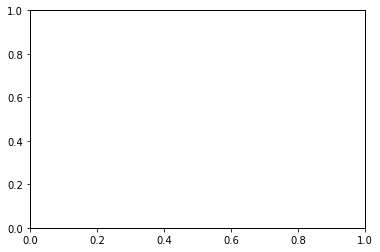

In [34]:
fig, ax = plt.subplots()
# plot_recall([0, 0.2, 0.4, 0.6, 0.8, 1.0],
#      [get_recall((kw_1.qvals <= 0.05), bin_0),
#       get_recall((kw_1.qvals <= 0.05), bin_0_20),
#       get_recall((kw_1.qvals <= 0.05), bin_20_40),
#       get_recall((kw_1.qvals <= 0.05), bin_40_60),
#       get_recall((kw_1.qvals <= 0.05), bin_60_80),
#       get_recall((kw_1.qvals <= 0.05), bin_80)], 'darkorange', 'Kruskal-Wallis')

# plot_recall([0, 0.2, 0.4, 0.6, 0.8, 1.0],
#      [get_recall((gearyc_1.qvals <= 0.05), bin_0),
#       get_recall((gearyc_1.qvals <= 0.05), bin_0_20),
#       get_recall((gearyc_1.qvals <= 0.05), bin_20_40),
#       get_recall((gearyc_1.qvals <= 0.05), bin_40_60),
#       get_recall((gearyc_1.qvals <= 0.05), bin_60_80),
#       get_recall((gearyc_1.qvals <= 0.05), bin_80)], 'forestgreen', "Geary's C")

plot_recall([0, 0.2, 0.4, 0.6, 0.8, 1.0],
     [get_recall((psix_results_1.qvals <= 0.05), bin_0),
      get_recall((psix_results_1.qvals <= 0.05), bin_0_20),
      get_recall((psix_results_1.qvals <= 0.05), bin_20_40),
      get_recall((psix_results_1.qvals <= 0.05), bin_40_60),
      get_recall((psix_results_1.qvals <= 0.05), bin_60_80),
      get_recall((psix_results_1.qvals <= 0.05), bin_80)], 'steelblue', 'Psix')

plt.xlabel(r'Simulated $\Delta \Psi$', fontsize=14)
plt.ylabel('Recall', fontsize=14)
ax.set_xticklabels(['0', '0', '(0-0.2]', '(0.2-0.4]', '(0.4-0.6]', '(0.6-0.8]', '(0.8-1.0]'])
plt.title('Simulated exons', fontsize=14)

plt.legend(frameon=False, fontsize=12)

In [26]:
bin_0

Int64Index([3328, 2860, 3276, 3527, 4876, 3972, 4621, 3331, 3483, 2868,
            ...
            2851, 4789, 3013, 4659, 3031, 3828, 4900, 3637, 3293, 2807],
           dtype='int64', length=1756)

In [67]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e900fd690>,
      dtype=object)

In [33]:
len(bin_80)

34

In [66]:
deltaPSI.loc[['gene'+str(x) for x in nonDE]].sort_values()

gene3067    0.000000
gene4170    0.000000
gene4174    0.000000
gene4577    0.000000
gene4764    0.000000
              ...   
gene1580    0.200450
gene1112    0.202196
gene276     0.203011
gene483     0.203090
gene2332    0.203364
Length: 1909, dtype: float64

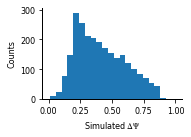

In [17]:
fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)

ax.hist(deltaPSI.loc[deltaPSI>0], bins=20)
ax.set_xlim([-0.05,1.05])
ax.set_xlabel(r'Simulated $\Delta \Psi$', size=8)
ax.set_ylabel('Counts', size=8)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=8)

plt.savefig('../plots/single_lineage_delta_PSI.png', bbox_inches='tight', res=20000, dpi =2000)

In [12]:
psix_single_lineage_1 = psix.Psix()
psix_single_lineage_1.junctions2psi(
        'processed_tables/splice_junction_counts_0.1.tab.gz',
        '',
        'processed_tables/tpm_0.1.tab.gz',
        save_files_in='psix_output/psix_object_0.1/')

psix_score_list = []

for capture in [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:

    psix_single_lineage_1.run_psix(latent='processed_tables/pc2_rd.tab.gz',  n_jobs=25,
                                    n_random_exons=3, n_neighbors=100, capture_efficiency = capture, pvals_bins=1)

    psix_results_ =  psix_single_lineage_1.psix_results.psix_score
    
    psix_score_list.append(psix_results_)


Obtaining PSI tables...
Reading TPM and transforming to mRNA counts...


100%|██████████| 1000/1000 [00:18<00:00, 52.68it/s]


Successfully processed RNA-seq data
Computing cell-cell metric...


100%|██████████| 1000/1000 [00:00<00:00, 7922.38it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:32<00:00, 108.27it/s] 

Successfully computed Psix score of exons.
Estimating p-values. This might take a while...



100%|██████████| 1/1 [00:00<00:00,  1.04it/s]


Successfully estimated p-values
Computing cell-cell metric...


100%|██████████| 1000/1000 [00:00<00:00, 7904.19it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:32<00:00, 107.65it/s] 

Successfully computed Psix score of exons.
Estimating p-values. This might take a while...



100%|██████████| 1/1 [00:01<00:00,  1.02s/it]


Successfully estimated p-values
Computing cell-cell metric...


100%|██████████| 1000/1000 [00:00<00:00, 6225.66it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:32<00:00, 107.06it/s] 

Successfully computed Psix score of exons.
Estimating p-values. This might take a while...



100%|██████████| 1/1 [00:00<00:00,  1.51it/s]


Successfully estimated p-values
Computing cell-cell metric...


100%|██████████| 1000/1000 [00:00<00:00, 7802.40it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:34<00:00, 101.33it/s] 

Successfully computed Psix score of exons.
Estimating p-values. This might take a while...



100%|██████████| 1/1 [00:00<00:00,  1.41it/s]


Successfully estimated p-values
Computing cell-cell metric...


100%|██████████| 1000/1000 [00:00<00:00, 7908.81it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:31<00:00, 111.42it/s] 

Successfully computed Psix score of exons.
Estimating p-values. This might take a while...



100%|██████████| 1/1 [00:00<00:00,  1.52it/s]


Successfully estimated p-values
Computing cell-cell metric...


100%|██████████| 1000/1000 [00:00<00:00, 6202.85it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:34<00:00, 100.72it/s] 

Successfully computed Psix score of exons.
Estimating p-values. This might take a while...



100%|██████████| 1/1 [00:01<00:00,  1.19s/it]


Successfully estimated p-values
Computing cell-cell metric...


100%|██████████| 1000/1000 [00:00<00:00, 6201.63it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:33<00:00, 104.15it/s] 

Successfully computed Psix score of exons.
Estimating p-values. This might take a while...



100%|██████████| 1/1 [00:00<00:00,  1.04it/s]


Successfully estimated p-values
Computing cell-cell metric...


100%|██████████| 1000/1000 [00:00<00:00, 6158.87it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:34<00:00, 102.15it/s] 

Successfully computed Psix score of exons.
Estimating p-values. This might take a while...



100%|██████████| 1/1 [00:00<00:00,  1.41it/s]


Successfully estimated p-values
Computing cell-cell metric...


100%|██████████| 1000/1000 [00:00<00:00, 5714.45it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:34<00:00, 102.46it/s] 

Successfully computed Psix score of exons.
Estimating p-values. This might take a while...



100%|██████████| 1/1 [00:01<00:00,  1.13s/it]


Successfully estimated p-values
Computing cell-cell metric...


100%|██████████| 1000/1000 [00:00<00:00, 6211.33it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:37<00:00, 91.97it/s]   

Successfully computed Psix score of exons.
Estimating p-values. This might take a while...



100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


Successfully estimated p-values
Computing cell-cell metric...


100%|██████████| 1000/1000 [00:00<00:00, 6225.09it/s]

Successfully computed cell-cell metric
Computing Psix score in 3486 exons



100%|██████████| 3486/3486 [00:38<00:00, 91.04it/s]   

Successfully computed Psix score of exons.
Estimating p-values. This might take a while...



100%|██████████| 1/1 [00:00<00:00,  1.07it/s]


Successfully estimated p-values


In [15]:
scores_df = pd.DataFrame()
scores_df['0.5'] = psix_score_list[10]
scores_df['0.45'] = psix_score_list[9]
scores_df['0.4'] = psix_score_list[8]
scores_df['0.35'] = psix_score_list[7]
scores_df['0.3'] = psix_score_list[6]
scores_df['0.25'] = psix_score_list[5]
scores_df['0.2'] = psix_score_list[4]
scores_df['0.15'] = psix_score_list[3]
scores_df['0.1'] = psix_score_list[2]
scores_df['0.05'] = psix_score_list[1]
scores_df['0.01'] = psix_score_list[0]

# scores_df.to_csv('psix_output/scores_different_capture_efficiency.tab.gz', sep='\t', index=True, header=True)

# psix_score_list[0]

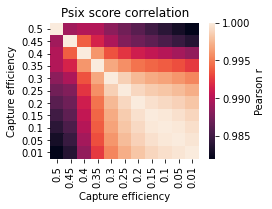

In [17]:
import seaborn as sns
fig = plt.figure(figsize=(8/2.4, 6/2.4))

sns.heatmap(scores_df.corr(), cbar_kws={'label': 'Pearson r'})
plt.xlabel('Capture efficiency')
plt.ylabel('Capture efficiency')

plt.title('Psix score correlation')

plt.savefig('../plots/scores_corr.png', bbox_inches='tight', res=20000, dpi =2000)
